In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [171]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [172]:
# import data
raw_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')

# Perform descriptive analysis and EDA

In [173]:
raw_data.head()
raw_data.describe()
raw_data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
# seperate numerical and categorical columns
target_cols = ['Survived']
num_cols = list(set(raw_data._get_numeric_data().columns) - set(target_cols))
cat_cols = list(set(raw_data.columns) - set(num_cols) - set(target_cols))

num_features = raw_data[num_cols]
cat_features = raw_data[cat_cols]

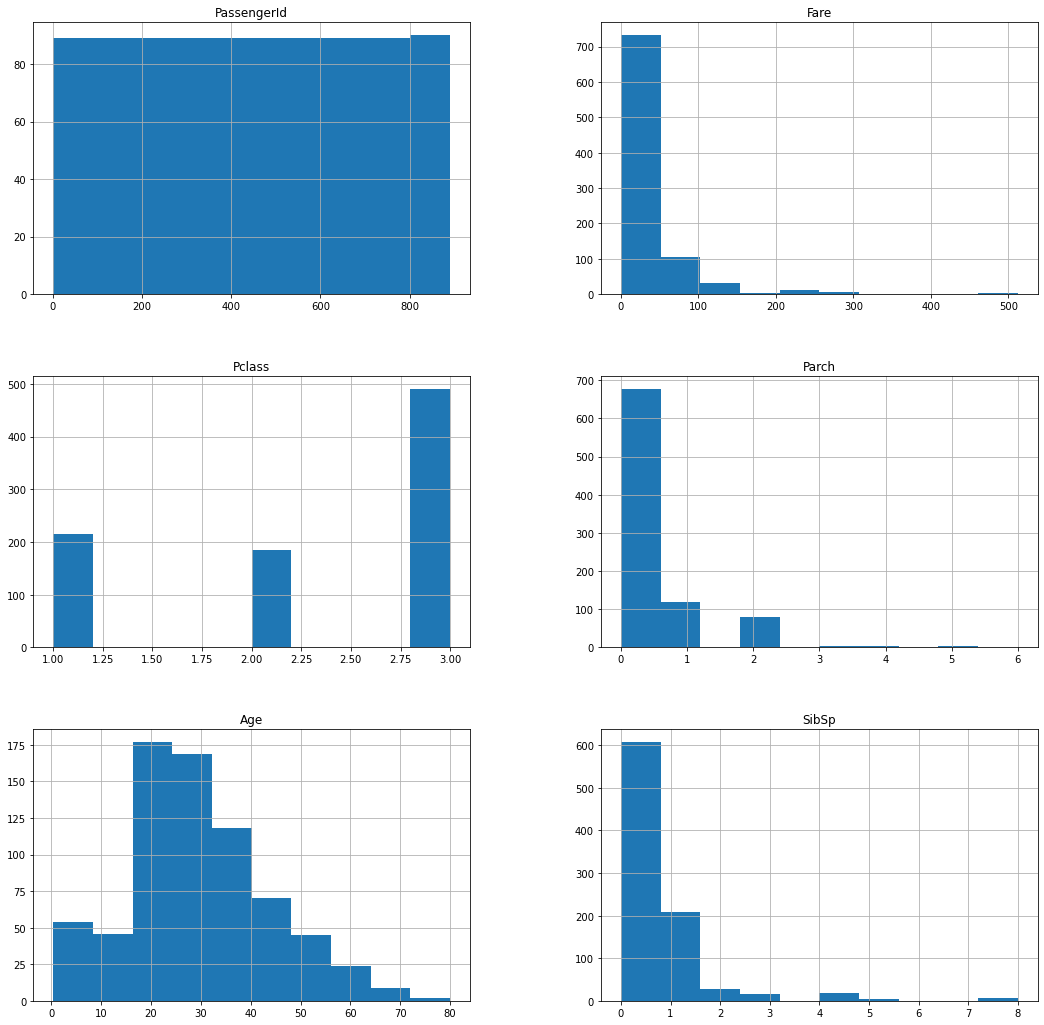

In [175]:
num_features.hist(figsize=(18,18));

# Sort Categorical Columns

In [176]:
cat_features.head()

,Ticket,Cabin,Name,Sex,Embarked
0,A/5 21171,NaN,"Braund, Mr. Owen Harris",male,S
1,PC 17599,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,STON/O2. 3101282,NaN,"Heikkinen, Miss. Laina",female,S
3,113803,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S
4,373450,NaN,"Allen, Mr. William Henry",male,S


In [177]:
# looking at histogram, some numerical variables should be treated as categorical
num_to_cat = ['Pclass']

cat_features['Pclass'] = raw_data[num_to_cat]
num_features.drop(num_to_cat, axis=1, inplace=True)

# num_features.shape
# cat_features.shape

In [178]:
# drop variables not helpful
# categorical
cat_cols_to_drop = ['Ticket','Name','Cabin']
cat_features.drop(cat_cols_to_drop, axis=1, inplace=True)
cat_features.head()

# numerical
num_cols_to_drop = ['PassengerId']
num_features.drop(num_cols_to_drop, axis=1, inplace=True)
num_features.head()

,Sex,Embarked,Pclass
0,male,S,3
1,female,C,1
2,female,S,3
3,female,S,1
4,male,S,3


,Fare,Parch,Age,SibSp
0,7.2500,0,22.0,1
1,71.2833,0,38.0,1
2,7.9250,0,26.0,0
3,53.1000,0,35.0,1
4,8.0500,0,35.0,0


In [179]:
# look at value counts for cat variables
cat_features['Embarked'].value_counts()
cat_features['Pclass'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [180]:
# one-hot encoding for cat variables
cat_OH = cat_features[['Sex', 'Embarked', 'Pclass']]
cat_features_OH = pd.get_dummies(data=cat_OH, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'])

In [181]:
cat_features_OH.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [182]:
# prep numerical features
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
normalized = transformer.fit_transform(num_features.loc[:,num_features.columns])
norm_num_df = pd.DataFrame(normalized, columns=num_features.columns)

In [183]:
norm_num_df

,Fare,Parch,Age,SibSp
0,-0.502445,-0.473674,-0.530377,0.432793
1,0.786845,-0.473674,0.571831,0.432793
2,-0.488854,-0.473674,-0.254825,-0.474545
3,0.420730,-0.473674,0.365167,0.432793
4,-0.486337,-0.473674,0.365167,-0.474545
...,...,...,...,...
886,-0.386671,-0.473674,-0.185937,-0.474545
887,-0.044381,-0.473674,-0.737041,-0.474545
888,-0.176263,2.008933,NaN,0.432793
889,-0.044381,-0.473674,-0.254825,-0.474545


In [184]:
# merge all data

model_df = norm_num_df.merge(cat_features_OH, how = 'outer', left_index = True, right_index = True)
model_df['Survived'] = raw_data['Survived']
print("Shape of numerical:", norm_num_df.shape)
print("Shape of categorical:", cat_features_OH.shape)
print("Shape of merged df:", model_df.shape)

model_df.head()

Shape of numerical: (891, 4)
Shape of categorical: (891, 8)
Shape of merged df: (891, 13)


,Fare,Parch,Age,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived
0,-0.502445,-0.473674,-0.530377,0.432793,0,1,0,0,1,0,0,1,0
1,0.786845,-0.473674,0.571831,0.432793,1,0,1,0,0,1,0,0,1
2,-0.488854,-0.473674,-0.254825,-0.474545,1,0,0,0,1,0,0,1,1
3,0.420730,-0.473674,0.365167,0.432793,1,0,0,0,1,1,0,0,1
4,-0.486337,-0.473674,0.365167,-0.474545,0,1,0,0,1,0,0,1,0


In [185]:
# deal with null values

model_df.isnull().sum()
model_df_drop = model_df.dropna()
model_df_drop.shape

# split into predictors and dependent variable
target_var = model_df_drop[['Survived']]
model_df_drop.head()
model_df_drop.drop(['Survived'], axis = 1, inplace = True)
model_df_drop.head()

Fare            0
Parch           0
Age           177
SibSp           0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Survived        0
dtype: int64

(714, 13)

,Fare,Parch,Age,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived
0,-0.502445,-0.473674,-0.530377,0.432793,0,1,0,0,1,0,0,1,0
1,0.786845,-0.473674,0.571831,0.432793,1,0,1,0,0,1,0,0,1
2,-0.488854,-0.473674,-0.254825,-0.474545,1,0,0,0,1,0,0,1,1
3,0.420730,-0.473674,0.365167,0.432793,1,0,0,0,1,1,0,0,1
4,-0.486337,-0.473674,0.365167,-0.474545,0,1,0,0,1,0,0,1,0


,Fare,Parch,Age,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-0.502445,-0.473674,-0.530377,0.432793,0,1,0,0,1,0,0,1
1,0.786845,-0.473674,0.571831,0.432793,1,0,1,0,0,1,0,0
2,-0.488854,-0.473674,-0.254825,-0.474545,1,0,0,0,1,0,0,1
3,0.420730,-0.473674,0.365167,0.432793,1,0,0,0,1,1,0,0
4,-0.486337,-0.473674,0.365167,-0.474545,0,1,0,0,1,0,0,1


# Classification Methods

In [186]:
# Create test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_df_drop, target_var, test_size = 0.25, random_state = 23)

In [187]:
# import analysis 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve


In [188]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(C = 10000)
logreg_clf.fit(X_train, y_train)
y_pred_logreg = logreg_clf.predict(X_test)

cross_val_score(logreg_clf, X_train, y_train, cv = 5, scoring = "accuracy")
logreg_matrix = confusion_matrix(y_test, y_pred_logreg)

log_precisions, log_recalls, log_thresholds = precision_recall_curve(y_test, y_pred_logreg)

LogisticRegression(C=10000)

array([0.80373832, 0.79439252, 0.78504673, 0.82242991, 0.80373832])

In [189]:
# analysis of logistic regression
logreg_precision_score = precision_score(y_test, y_pred_logreg)
logreg_recall_score = recall_score(y_test, y_pred_logreg)

print('The precision for logistic regression on test:', logreg_precision_score)
print('The recall for logistic regression on test split:', logreg_recall_score)

The precision for logistic regression on test: 0.7230769230769231
The recall for logistic regression on test split: 0.6619718309859155


In [190]:
# SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)

cross_val_score(sgd_clf, X_train, y_train, cv = 5, scoring = "accuracy")

SGDClassifier()

array([0.63551402, 0.71028037, 0.75700935, 0.72897196, 0.74766355])

In [191]:
# analysis of sgd
sgd_precision_score = precision_score(y_test, y_pred_sgd)
sgd_recall_score = recall_score(y_test, y_pred_sgd)

print('The precision for sgd on test split:', sgd_precision_score)
print('The recall for sgd on test split:', sgd_recall_score)

The precision for sgd on test split: 0.7659574468085106
The recall for sgd on test split: 0.5070422535211268


In [192]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
y_pred_lda = lda_clf.predict(X_test)

cross_val_score(lda_clf, X_train, y_train, cv = 5, scoring = "accuracy")

LinearDiscriminantAnalysis()

array([0.78504673, 0.77570093, 0.79439252, 0.80373832, 0.80373832])

In [193]:
# analysis of LDA
lda_precision_score = precision_score(y_test, y_pred_lda)
lda_recall_score = recall_score(y_test, y_pred_lda)

print('The precision for LDA on test split:', lda_precision_score)
print('The recall for LDA on test split:', lda_recall_score)

The precision for LDA on test split: 0.7230769230769231
The recall for LDA on test split: 0.6619718309859155


In [194]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 10)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

cross_val_score(knn_clf, X_train, y_train, cv = 5, scoring = "accuracy")

KNeighborsClassifier(n_neighbors=10)

array([0.85046729, 0.80373832, 0.81308411, 0.8317757 , 0.82242991])

In [195]:
# analysis of knn
knn_precision_score = precision_score(y_test, y_pred_knn)
knn_recall_score = recall_score(y_test, y_pred_knn)

print('The precision for knn on test split:', knn_precision_score)
print('The recall for knn on test split:', knn_recall_score)

The precision for knn on test split: 0.7894736842105263
The recall for knn on test split: 0.6338028169014085


In [196]:
y_scores_logreg = cross_val_predict(logreg_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")
y_scores_lda = cross_val_predict(lda_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")
# y_scores_knn = cross_val_predict(knn_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")

log_precisions, log_recalls, log_thresholds = precision_recall_curve(y_train, y_scores_logreg)
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_train, y_scores_sgd)
lda_precisions, lda_recalls, lda_thresholds = precision_recall_curve(y_train, y_scores_lda)
# knn_precisions, knn_recalls, knn_thresholds = precision_recall_curve(y_train, y_scores_knn)

In [197]:
# plot functions

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid


Text(0.5, 1.0, 'Logistic Regression')

Text(0.5, 0, 'Threshold')

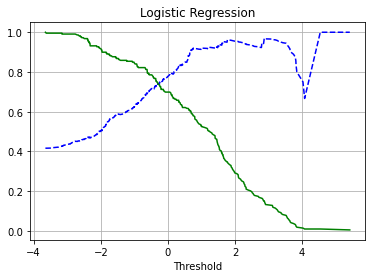

In [198]:
plot_precision_recall_vs_threshold(log_precisions, log_recalls, log_thresholds)
plt.title('Logistic Regression')
plt.grid()
plt.xlabel('Threshold')
plt.show()

Text(0.5, 1.0, 'Stochastic Gradient Descent')

Text(0.5, 0, 'Threshold')

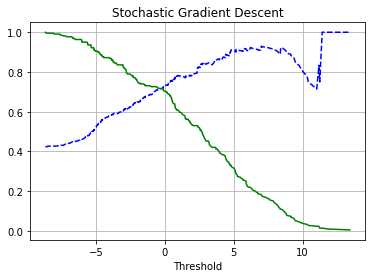

In [199]:
plot_precision_recall_vs_threshold(sgd_precisions, sgd_recalls, sgd_thresholds)
plt.title('Stochastic Gradient Descent')
plt.grid()
plt.xlabel('Threshold')
plt.show()

Text(0.5, 1.0, 'Linear Discriminant Analysis')

Text(0.5, 0, 'Threshold')

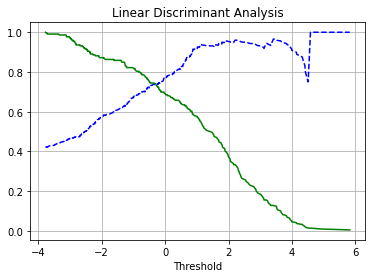

In [200]:
plot_precision_recall_vs_threshold(lda_precisions, lda_recalls, lda_thresholds)
plt.title('Linear Discriminant Analysis')
plt.grid()
plt.xlabel('Threshold')
plt.show()

Text(0.5, 1.0, 'Logistic Regression')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

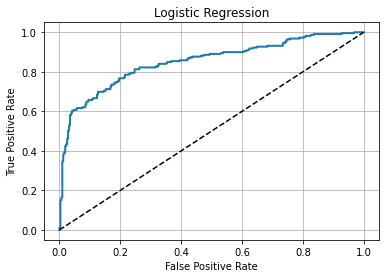

In [201]:
log_fpr, log_tpr, log_thresholds = roc_curve(y_train, y_scores_logreg)
plot_roc_curve(log_fpr, log_tpr, log_thresholds)
plt.title('Logistic Regression')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Text(0.5, 1.0, 'Stochastic Gradient Descent')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

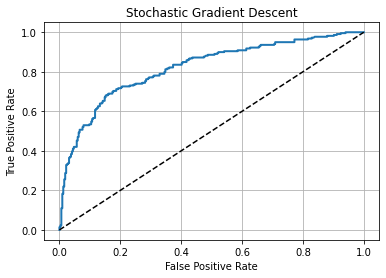

In [202]:
sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(y_train, y_scores_sgd)
plot_roc_curve(sgd_fpr, sgd_tpr, sgd_thresholds)
plt.title('Stochastic Gradient Descent')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Text(0.5, 1.0, 'Linear Discriminant Analysis')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

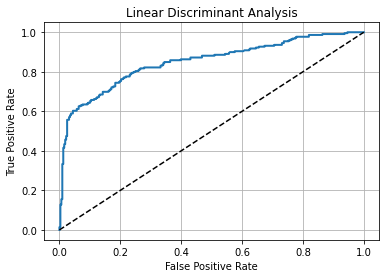

In [203]:
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_train, y_scores_lda)
plot_roc_curve(lda_fpr, lda_tpr, lda_thresholds)
plt.title('Linear Discriminant Analysis')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# Apply models to test.csv and export

In [204]:
# import test.csv

TestData = pd.read_csv('test.csv')

In [205]:
# fix null values
TestData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [206]:
TestData['Age'] = TestData['Age'].fillna(TestData['Age'].median())
TestData['Fare'] = TestData['Fare'].fillna(TestData['Fare'].median())
TestData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [207]:
# seperate numerical and categorical columns

num_cols = list(set(TestData._get_numeric_data().columns) - set(target_cols))
cat_cols = list(set(TestData.columns) - set(num_cols) - set(target_cols))

num_features = TestData[num_cols]
cat_features = TestData[cat_cols]

In [208]:
# looking at histogram, some numerical variables should be treated as categorical
num_to_cat = ['Pclass']

cat_features['Pclass'] = TestData[num_to_cat]
num_features.drop(num_to_cat, axis=1, inplace=True)

# num_features.shape
# cat_features.shape

In [209]:
# drop variables not helpful
# categorical
cat_cols_to_drop = ['Ticket','Name','Cabin']
cat_features.drop(cat_cols_to_drop, axis=1, inplace=True)
cat_features.head()

# numerical
num_cols_to_drop = ['PassengerId']
num_features.drop(num_cols_to_drop, axis=1, inplace=True)
num_features.head()

,Sex,Embarked,Pclass
0,male,Q,3
1,female,S,3
2,male,Q,2
3,male,S,3
4,female,S,3


,Fare,Parch,Age,SibSp
0,7.8292,0,34.5,0
1,7.0000,0,47.0,1
2,9.6875,0,62.0,0
3,8.6625,0,27.0,0
4,12.2875,1,22.0,1


In [210]:
# one-hot encoding for cat variables
cat_OH = cat_features[['Sex', 'Embarked', 'Pclass']]
cat_features_OH = pd.get_dummies(data=cat_OH, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'])

In [211]:
# prep numerical features
normalized = transformer.fit_transform(num_features.loc[:,num_features.columns])
norm_num_df = pd.DataFrame(normalized, columns=num_features.columns)

In [212]:
# merge all data

test_df = norm_num_df.merge(cat_features_OH, how = 'outer', left_index = True, right_index = True)
print("Shape of numerical:", norm_num_df.shape)
print("Shape of categorical:", cat_features_OH.shape)
print("Shape of merged df:", model_df.shape)

test_df.head()

Shape of numerical: (418, 4)
Shape of categorical: (418, 8)
Shape of merged df: (891, 13)


,Fare,Parch,Age,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-0.497413,-0.400248,0.386231,-0.499470,0,1,0,1,0,0,0,1
1,-0.512278,-0.400248,1.371370,0.616992,1,0,0,0,1,0,0,1
2,-0.464100,-0.400248,2.553537,-0.499470,0,1,0,1,0,0,1,0
3,-0.482475,-0.400248,-0.204852,-0.499470,0,1,0,0,1,0,0,1
4,-0.417492,0.619896,-0.598908,0.616992,1,0,0,0,1,0,0,1


In [213]:
# apply models
logreg_clf.fit(model_df_drop, target_var)
sgd_clf.fit(model_df_drop, target_var)
lda_clf.fit(model_df_drop, target_var)
knn_clf.fit(model_df_drop, target_var)

logreg_results = logreg_clf.predict(test_df)
sgd_results = sgd_clf.predict(test_df)
lda_results = lda_clf.predict(test_df)
knn_results = knn_clf.predict(test_df)

LogisticRegression(C=10000)

SGDClassifier()

LinearDiscriminantAnalysis()

KNeighborsClassifier(n_neighbors=10)

In [215]:
output_results_logreg = {'PassengerId':TestData.PassengerId, 'Survived':logreg_results}
output_results_sgd = {'PassengerId':TestData.PassengerId, 'Survived':sgd_results}
output_results_lda = {'PassengerId':TestData.PassengerId, 'Survived':lda_results}
output_results_knn = {'PassengerId':TestData.PassengerId, 'Survived':knn_results}

output_results_logreg = pd.DataFrame(data = output_results_logreg)
output_results_sgd = pd.DataFrame(data = output_results_sgd)
output_results_lda = pd.DataFrame(data = output_results_lda)
output_results_knn= pd.DataFrame(data = output_results_knn)

output_results_logreg.to_csv('logreg_output.csv', index=False)
output_results_sgd.to_csv('sgd_output.csv', index=False)
output_results_lda.to_csv('lda_output.csv', index=False)
output_results_knn.to_csv('knn_output.csv', index=False)